# IMPORTING LIBRARIES

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reading the dataset

In [2]:
#Reading the data set from the .csv file
data=pd.read_csv("h1b_kaggle.csv")

In [3]:
#Checking the number of rows and columns of our data set
data.shape

(3002458, 11)

In [4]:
#Checking the attributes in the dataset
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# Exploratory DATA ANALYSIS

In [5]:
#Checking the null values in the dataset
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [6]:
#Removing the null values from the dataset
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [7]:
#Checking the rows and columns of the data set
data.shape

(2877765, 11)

In [8]:
#Removing redundancy from the target feature
data.CASE_STATUS.value_counts()

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
INVALIDATED                                                 1
REJECTED                                                    1
Name: CASE_STATUS, dtype: int64

In [9]:
#Checking the data types ofthe attributes of the dataset
data.info()
#Checking the statistical data of the attributes
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 0 to 3002444
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 263.5+ MB


,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,2.877765e+06,2.877765e+06,2.877765e+06,2.877765e+06,2.877765e+06
mean,1.489381e+06,1.451666e+05,2.013877e+03,-9.212937e+01,3.815896e+01
std,8.659624e+05,5.307856e+06,1.675226e+00,1.965994e+01,4.674872e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.404220e+05,5.460000e+04,2.012000e+03,-1.118999e+02,3.416536e+01
50%,1.484061e+06,6.512500e+04,2.014000e+03,-8.615807e+01,3.910312e+01
75%,2.236965e+06,8.151500e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002445e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [10]:
#Removing redundancy values from the target attribute
import warnings
warnings.filterwarnings("ignore")
data.CASE_STATUS[data['CASE_STATUS']=='REJECTED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'
data = data.drop(data[data.CASE_STATUS == 'WITHDRAWN'].index)

In [11]:
#Dropping the unwanted attributes from the dataset
data = data.drop('lat', axis = 1)
data = data.drop('lon', axis = 1)

In [12]:
#Checking the attributes in the dataset
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,3,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,4,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
5,6,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA"


In [13]:
#Adding new attributes for the pre-processing in the dataset
data['NEW_EMPLOYER'] = np.nan
data.shape

(2793013, 10)

In [14]:
#Assigning the values to the new attribute added
data['EMPLOYER_NAME'] = data['EMPLOYER_NAME'].str.lower()
data.NEW_EMPLOYER[data['EMPLOYER_NAME'].str.contains('university')] = 'university'
data['NEW_EMPLOYER']= data.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

In [15]:
#Checking the attributes of the data set
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,NEW_EMPLOYER
0,1,CERTIFIED,university of michigan,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university
1,2,CERTIFIED,"goodman networks, inc.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",non university
2,3,CERTIFIED,"ports america group, inc.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",non university
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",non university
5,6,CERTIFIED,burger king corporation,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",non university


In [16]:
# Splitting city and state and capturing state in another variable
data['STATE'] = data.WORKSITE.str.split(', ').str[-1]

In [17]:
#Checking the attributes of the data set
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,NEW_EMPLOYER,STATE
0,1,CERTIFIED,university of michigan,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,MICHIGAN
1,2,CERTIFIED,"goodman networks, inc.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",non university,TEXAS
2,3,CERTIFIED,"ports america group, inc.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",non university,NEW JERSEY
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",non university,COLORADO
5,6,CERTIFIED,burger king corporation,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",non university,FLORIDA


In [18]:
#Dropping the unwanted attributes from the dataset
data = data.drop('EMPLOYER_NAME', axis = 1)
data = data.drop('WORKSITE', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)

In [19]:
#Checking the attributes of the data set
data.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,STATE
0,CERTIFIED,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,university,MICHIGAN
1,CERTIFIED,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,non university,TEXAS
2,CERTIFIED,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,non university,NEW JERSEY
3,CERTIFIED,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,non university,COLORADO
5,CERTIFIED,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,non university,FLORIDA


In [20]:
#Coverting the categorical values into numerical values for further processing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[['CASE_STATUS','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','NEW_EMPLOYER','STATE']] = data[['CASE_STATUS','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','NEW_EMPLOYER','STATE']].apply(le.fit_transform)

In [21]:
len(data.SOC_NAME.unique())

2019

In [22]:
#Checking the attributes of the data set
data.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,STATE
0,0,160,153988,0,36067.0,2016.0,1,22
1,0,242,40901,1,242674.0,2016.0,0,45
2,0,242,40967,1,193066.0,2016.0,0,31
3,0,242,176465,1,220314.0,2016.0,0,5
5,0,242,83327,1,225000.0,2016.0,0,9


In [23]:
data['JOB_TITLE'][39]

40638

In [24]:
#Checking the data types ofthe attributes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2793013 entries, 0 to 3002392
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         int32  
 1   SOC_NAME            int32  
 2   JOB_TITLE           int32  
 3   FULL_TIME_POSITION  int32  
 4   PREVAILING_WAGE     float64
 5   YEAR                float64
 6   NEW_EMPLOYER        int32  
 7   STATE               int32  
dtypes: float64(2), int32(6)
memory usage: 127.9 MB


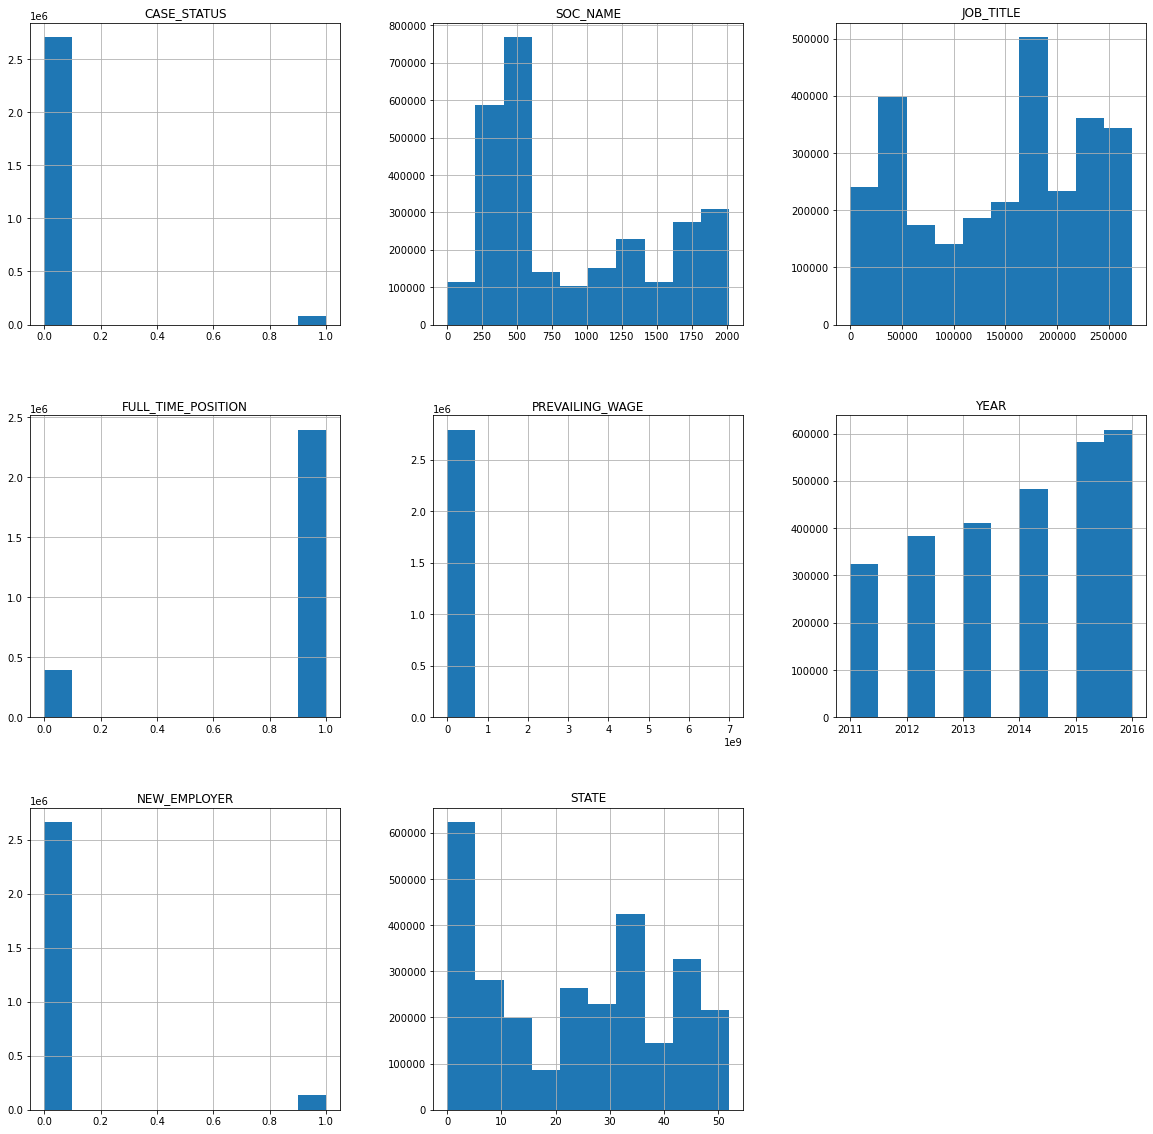

In [25]:
#Visualizing the performance of each attribute in the dataset
data.hist(figsize=(20,20))
plt.show()

# Splitting of a dataset

In [26]:
x = data.drop('CASE_STATUS', axis=1)
print(x)

         SOC_NAME  JOB_TITLE  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR  \
0             160     153988                   0          36067.0  2016.0   
1             242      40901                   1         242674.0  2016.0   
2             242      40967                   1         193066.0  2016.0   
3             242     176465                   1         220314.0  2016.0   
5             242      83327                   1         225000.0  2016.0   
...           ...        ...                 ...              ...     ...   
3002369      1077     201985                   1          46738.0  2011.0   
3002378        83       1717                   1          45760.0  2011.0   
3002383       487       8937                   1          54080.0  2011.0   
3002389      1834     184110                   1          55141.0  2011.0   
3002392       127      11841                   1          69368.0  2011.0   

         NEW_EMPLOYER  STATE  
0                   1     22  
1            

In [27]:
y = data.CASE_STATUS
print(y)

0          0
1          0
2          0
3          0
5          0
          ..
3002369    1
3002378    1
3002383    1
3002389    1
3002392    1
Name: CASE_STATUS, Length: 2793013, dtype: int32


In [28]:
#Splitting the dataset into train and test data using sklearn
from sklearn.model_selection import train_test_split
#x = data.drop('CASE_STATUS', axis=1)
#y = data.CASE_STATUS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 )

In [29]:
#Scaling the dataset for inputting the values  
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [30]:
#Converting the values into byte stream
import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

In [31]:
#Applying the scaler function for the dataset
X_scaler = StandardScaler().fit(x_train)
X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)

# Logistic Regression

In [32]:
#Importing the logistic regression function from the sklearn library
#Applying the logistic regression algorithm for the dataset and predcting the target variable
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [33]:
#Importing the Classifier and confusion matrix from the sklearn library
#Visualizing the classification report and the confusion matrix using logistic regression algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_test, pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    541286
           1       0.96      0.02      0.03     17317

    accuracy                           0.97    558603
   macro avg       0.97      0.51      0.51    558603
weighted avg       0.97      0.97      0.96    558603



Confusion Matrix:
[[541275     11]
 [ 17019    298]]


In [34]:
#Predicting the accuracy of the target variable using logistic regression 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9695132321165479


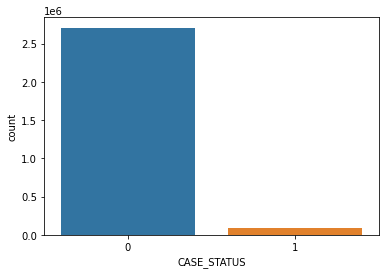

In [35]:
#Visualizing the data of target attribute using countplot
sns.countplot(x=data['CASE_STATUS'], data=data)
plt.show()

In [36]:
#undersampling the dataset to balance the case_status
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_res, y_res = nm.fit_resample(x, y)

In [37]:
x_res.shape

(170356, 7)

In [38]:
##Importing the logistic regression function from the sklearn library
#Applying the logistic regression algorithm for the dataset and predcting the target variable
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size=0.2)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [39]:
##Importing the Classifier and confusion matrix from the sklearn library
#Visualizing the classification report and the confusion matrix using logistic regression algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(Y_test,Y_Test_Pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_Test_Pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69     17119
           1       0.68      0.67      0.68     16953

    accuracy                           0.68     34072
   macro avg       0.68      0.68      0.68     34072
weighted avg       0.68      0.68      0.68     34072



Confusion Matrix:
[[11830  5289]
 [ 5531 11422]]


In [40]:
#Predicting the accuracy of the target variable using logistic regression 
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_Test_Pred))

0.6824371918290678


# K Nearest Neighbours(KNN)

In [41]:
#Importing the KNN function from the sklearn library
#Applying the KNN algorithm for the dataset and predcting the target variable
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
k_pred = knn.predict(X_test)

In [42]:
#Importing the Classifier and confusion matrix from the sklearn library
#Visualizing the classification report and the confusion matrix using KNN algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(Y_test,k_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test, k_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17119
           1       0.99      0.95      0.97     16953

    accuracy                           0.97     34072
   macro avg       0.97      0.97      0.97     34072
weighted avg       0.97      0.97      0.97     34072



Confusion Matrix:
[[16976   143]
 [  770 16183]]


In [43]:
#Predicting the accuracy of the target variable using KNN algorithm
print(accuracy_score(Y_test, k_pred))

0.973203803709791


In [44]:
#choosing the right K value 
error_rate = [] 
for i in range(1, 20): 
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, Y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != Y_test)) 

Text(0, 0.5, 'Error Rate')

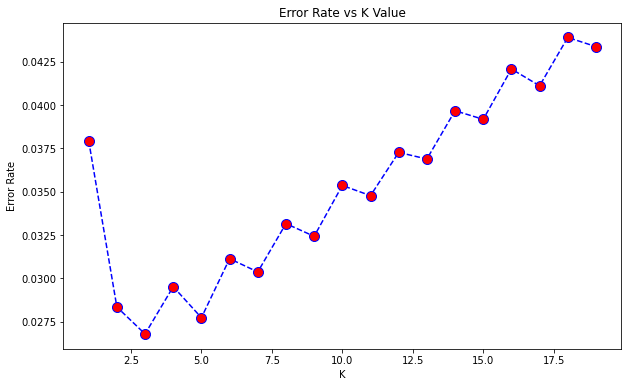

In [45]:
#plotting the error rate of k value using matplotlib
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 20), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

# Decision Tree

In [46]:
#Importing the Decision tree function from the sklearn library
#Applying the Decision tree algorithm for the dataset and predcting the target variable
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
d_pred = dtc.predict(X_test)

In [47]:
#Importing the Classifier and confusion matrix from the sklearn library
#Visualizing the classification report and the confusion matrix using Decision tree algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(Y_test,d_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test,d_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17119
           1       0.99      0.96      0.98     16953

    accuracy                           0.98     34072
   macro avg       0.98      0.98      0.98     34072
weighted avg       0.98      0.98      0.98     34072



Confusion Matrix:
[[17033    86]
 [  709 16244]]


In [48]:
#Predicting the accuracy of the target variable using decision tree algorithm
print(accuracy_score(Y_test,d_pred))

0.9766670579948344


# Random Forest 

In [49]:
#Importing the random forest function from the sklearn library
#Applying the random forest algorithm for the dataset and predcting the target variable
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=12)
rf.fit(X_train,Y_train)
r_pred=rf.predict(X_test)
print(r_pred,X_test)

[0 1 0 ... 0 0 1]         SOC_NAME  JOB_TITLE  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR  \
19549       1745     221927                   0          63877.0  2016.0   
156398       847      64183                   1         138528.0  2011.0   
5248         369     164618                   0          62566.0  2016.0   
169028        92     129620                   1          57865.6  2011.0   
27477        337     164618                   1          66602.0  2015.0   
...          ...        ...                 ...              ...     ...   
35047        337     164618                   1          52499.0  2015.0   
50477        337     164618                   1          69056.0  2015.0   
28956        684     167285                   1          66248.0  2015.0   
22334       1745     220022                   0          63877.0  2016.0   
153952       449      41561                   1          53000.0  2011.0   

        NEW_EMPLOYER  STATE  
19549              0     31  
156398   

In [50]:
print(data['SOC_NAME'][1543])

914


In [51]:
#Importing the Classifier and confusion matrix from the sklearn library
#Visualizing the classification report and the confusion matrix using random forest algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(Y_test,r_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test,r_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17119
           1       0.99      0.96      0.98     16953

    accuracy                           0.98     34072
   macro avg       0.98      0.98      0.98     34072
weighted avg       0.98      0.98      0.98     34072



Confusion Matrix:
[[17002   117]
 [  604 16349]]


In [52]:
#Predicting the accuracy of the target variable using random forest algorithm
print(accuracy_score(Y_test,r_pred))

0.9788389293261329


In [53]:
#undersampling the dataset to balance the case_status
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_res, y_res = nm.fit_resample(x, y)

In [54]:
##Importing the logistic regression function from the sklearn library
#Applying the logistic regression algorithm for the dataset and predcting the target variable
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size=0.2)
rf1 = RandomForestClassifier().fit(X_train, Y_train)
rf1_Pred = rf1.predict(X_test)

In [55]:
##Importing the Classifier and confusion matrix from the sklearn library
#Visualizing the classification report and the confusion matrix using logistic regression algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(Y_test,rf1_Pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test, rf1_Pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17027
           1       0.99      0.97      0.98     17045

    accuracy                           0.98     34072
   macro avg       0.98      0.98      0.98     34072
weighted avg       0.98      0.98      0.98     34072



Confusion Matrix:
[[16913   114]
 [  568 16477]]


In [56]:
#Predicting the accuracy of the target variable using logistic regression 
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, rf1_Pred))

0.9799835642169523


# GAUSSIAN NAIVE BAYES

In [57]:
#Importing the GAUSSIAN NAIVE BAYES function from the sklearn library
#Applying the GAUSSIAN NAIVE BAYESalgorithm for the dataset and predcting the target variable
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
n_pred=nb.predict(X_test)

In [58]:
#Importing the Classifier and confusion matrix from the sklearn library
#Visualizing the classification report and the confusion matrix using gaussian naive bayes algorithm
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(Y_test,n_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test,n_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.99      0.68     17027
           1       0.93      0.07      0.12     17045

    accuracy                           0.53     34072
   macro avg       0.72      0.53      0.40     34072
weighted avg       0.72      0.53      0.40     34072



Confusion Matrix:
[[16939    88]
 [15909  1136]]


In [59]:
#Predicting the accuracy of the target variable using gaussian  naive bayes algorithm
print(accuracy_score(Y_test,n_pred))

0.5304942474759333


In [60]:
#Printing the accuracy scores of each and every algorithm for analyzing
print("Accuracy scores of each model")
print("LogisticRegression: ",accuracy_score(Y_test, Y_Test_Pred))
print("Knn               : ",accuracy_score(Y_test, k_pred))
print("Decision tree     : ",accuracy_score(Y_test,d_pred))
print("Random forest     : ",accuracy_score(Y_test,rf1_Pred))
print("GaussianNB        : ",accuracy_score(Y_test,n_pred))
print()
print("Highest accuracy is for logistic regression")

Accuracy scores of each model
LogisticRegression:  0.501291382953745
Knn               :  0.5040208969241606
Decision tree     :  0.5026121155200751
Random forest     :  0.9799835642169523
GaussianNB        :  0.5304942474759333

Highest accuracy is for logistic regression


In [61]:
#mcnemar's statistical test between random forest and decision tree for 4 iterations
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar
rfc_score=[]
dt_score=[]
for i in [9,15,42,98] :
    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_res,y_res, test_size=0.2, random_state=i)
    rf.fit(X_train1,Y_train1)
    r_avg=rf.predict(X_test1)
    r_pred_avg=accuracy_score(Y_test1,r_avg)
    rfc_score.append(r_pred_avg)
    dtc.fit(X_train1, Y_train1)
    d_avg = dtc.predict(X_test1)
    d_pred_avg=accuracy_score(Y_test1,d_avg)
    dt_score.append(d_pred_avg)
    tb = mcnemar_table(y_target=Y_test, 
                   y_model1=r_avg, 
                   y_model2=d_avg)

    print(tb)
    print()

[[17028    83]
 [   91 16870]]

[[16911    81]
 [   82 16998]]

[[16850    92]
 [   80 17050]]

[[17064    71]
 [   85 16852]]



In [62]:
#this is the accuracy of random forest and decision tree on 4 iterations
print("random forest: ",rfc_score)
print("decition tree: ",dt_score)

random forest:  [0.9787802301009627, 0.9784867339751115, 0.9772540502465368, 0.9785160835876966]
decition tree:  [0.9764322610941536, 0.9759333176802066, 0.9750234796900681, 0.9769899037332708]


In [63]:
#this is the mean accuracy of random forest and decision tree
print("mean accuracy of random forest is: ",np.mean(rfc_score))
print("mean accuracy of decision tree is: ",np.mean(dt_score))

mean accuracy of random forest is:  0.9782592744775769
mean accuracy of decision tree is:  0.9760947405494249


In [64]:
#Finalizing the best fit algorithm for prediction using joblib library
import joblib as joblib
filename = 'model.sav'
joblib.dump(rf, filename)

['model.sav']

In [65]:
import joblib as joblib
import pickle

#Reading the data set from the .csv file


model = joblib.load("model.sav")
scalerX = pickle.load(open("scalerX", "rb"))

#to_predict = ([242,40638,1,187200.0,2016.0,0,49])
to_predict = ([1875,221927,1,98675.0,2014,0,4])
#to_predict = ([242,40901,1,242674.0,2016,0,45])

#print([to_predict])
pred = model.predict([to_predict])
print(pred)

if pred == 0:
    print('Yah !! Congragulations , you have granted for the VISA :)')
    
else:
    print('We are sorry for rejection of the VISA :(')
    

[0]
Yah !! Congragulations , you have granted for the VISA :)
